# Sentiment Analysis for Mental Health

## Data Loading

In [1]:
# Downloading dataset via Kaggle

!kaggle datasets download -d suchintikasarkar/sentiment-analysis-for-mental-health

Dataset URL: https://www.kaggle.com/datasets/suchintikasarkar/sentiment-analysis-for-mental-health
License(s): DbCL-1.0
 54% 6.00M/11.1M [00:00<00:00, 60.0MB/s]
100% 11.1M/11.1M [00:00<00:00, 68.0MB/s]


In [2]:
# Extracting data from ZipFile

import zipfile
zipfile_ref = zipfile.ZipFile('/content/sentiment-analysis-for-mental-health.zip','r')
zipfile_ref.extractall('/content')
zipfile_ref.close()

## Exploratory Data Analysis

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [104]:
df = pd.read_csv('/content/Combined Data.csv')

In [5]:
df.head(5)

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [6]:
df.shape

(53043, 3)

In [7]:
df.size

159129

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  53043 non-null  int64 
 1   statement   52681 non-null  object
 2   status      53043 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [9]:
df.describe()

,Unnamed: 0
count,53043.000000
mean,26521.000000
std,15312.339501
min,0.000000
25%,13260.500000
50%,26521.000000
75%,39781.500000
max,53042.000000


In [10]:
df.isnull().sum()

,0
Unnamed: 0,0
statement,362
status,0


In [11]:
df.duplicated().sum()

0

In [12]:
df.nunique()

,0
Unnamed: 0,53043
statement,51073
status,7


In [113]:
unique_status = df['status'].unique()
print(unique_status)

['Anxiety' 'Normal' 'Depression' 'Suicidal' 'Stress' 'Bipolar'
 'Personality disorder']


## Data Visualization

In [ ]:
# Duplicating dataframe for data visualization

df_dv = df.copy()

In [ ]:
# Labelling the dataframe

df_dv.rename(columns={'statement': 'Text', 'status': 'Label'}, inplace=True)

df_dv['Label'] = df_dv['Label'].replace({
    0: 'Anxiety',
    1: 'Normal',
    2: 'Depression',
    3: 'Suicidal',
    4: 'Stress',
    5: 'Bipolar',
    6: 'Personality disorder'
})

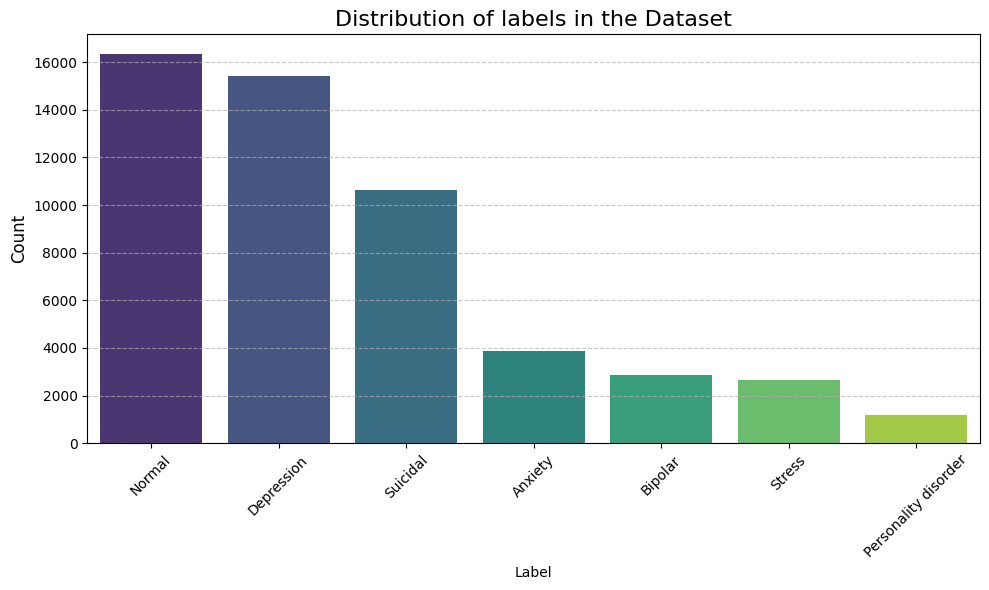

In [ ]:
# Visualizing Distribution of Labels

label_counts = df_dv['Label'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.title('Distribution of labels in the Dataset', fontsize=16)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

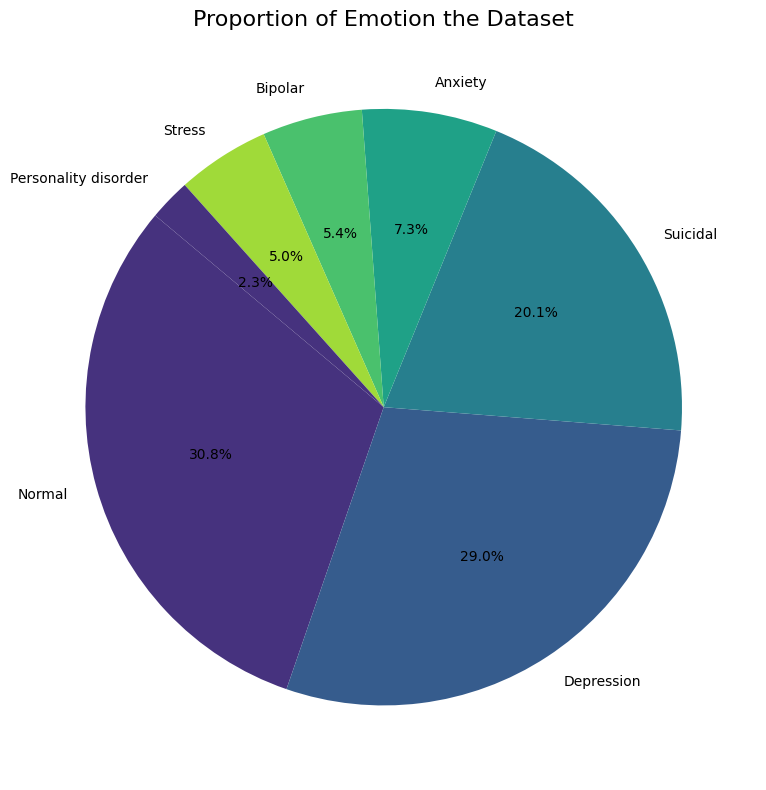

In [ ]:
# Visualizing Label Distribution

plt.figure(figsize=(8, 8))

df_dv['Label'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'))
plt.title('Proportion of Emotion the Dataset', fontsize=16)
plt.ylabel('')
plt.tight_layout()
plt.show()

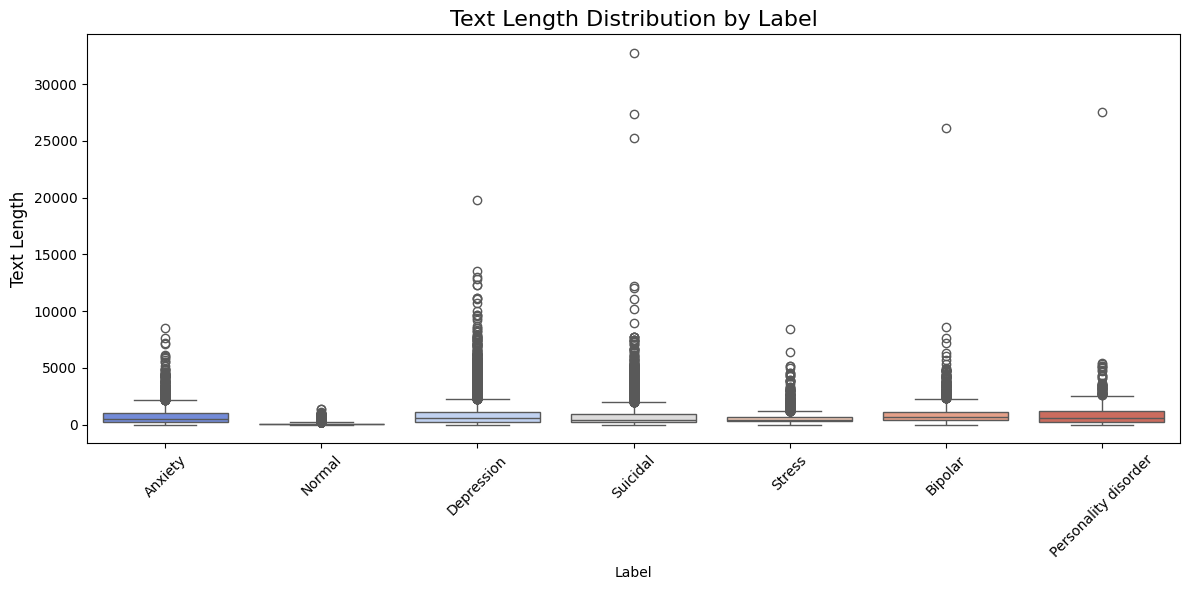

In [ ]:
# Representing Text Length Distribution by Labels

df_dv['Text_Length'] = df_dv['Text'].astype(str).apply(len)

plt.figure(figsize=(12, 6))
sns.boxplot(x='Label', y='Text_Length', data=df_dv, palette='coolwarm')
plt.title('Text Length Distribution by Label', fontsize=16)
plt.ylabel('Text Length', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

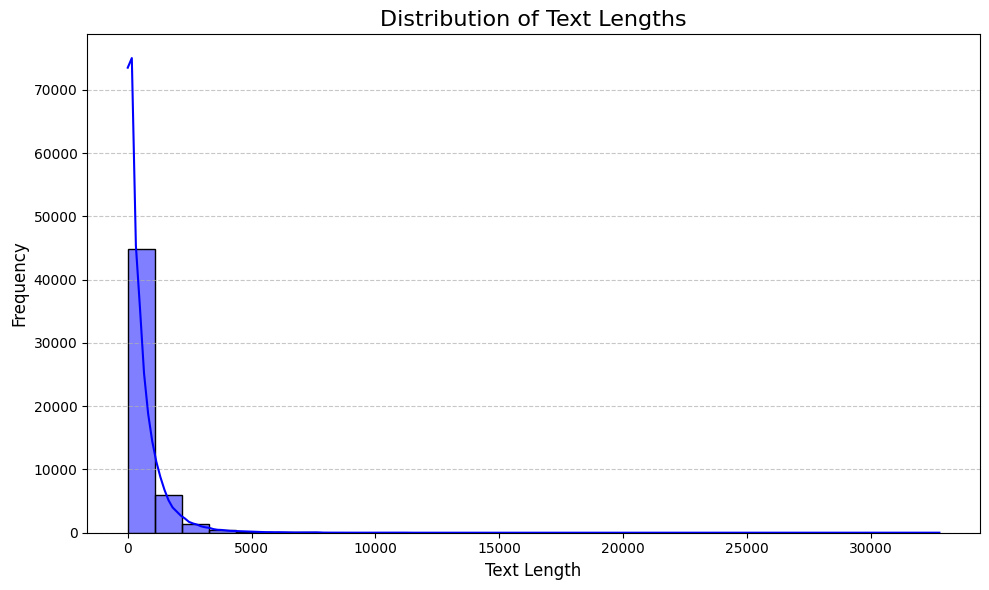

In [ ]:
# Plotting Histogram for Distributon of Text Lengths

plt.figure(figsize=(10, 6))
df_dv['Text_Length'] = df_dv['Text'].astype(str).apply(len)
sns.histplot(df_dv['Text_Length'], bins=30, kde=True, color='blue')
plt.title('Distribution of Text Lengths', fontsize=16)
plt.xlabel('Text Length', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

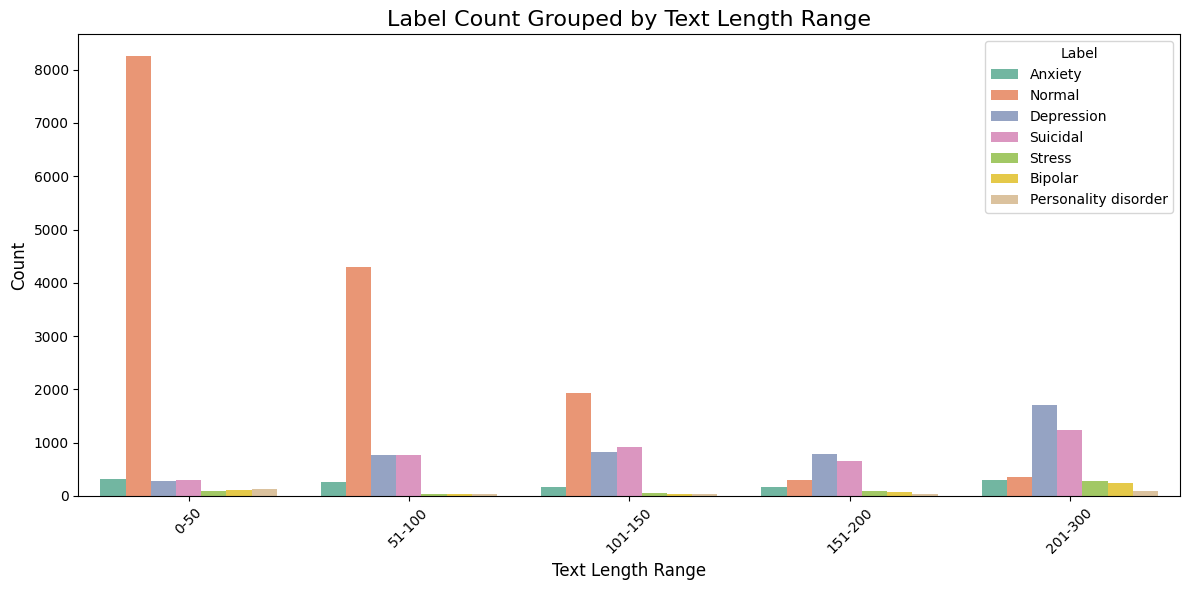

In [ ]:
# Visualizing Label Count Grouped by Text Length Range

df_dv['Length_Bin'] = pd.cut(df_dv['Text_Length'], bins=[0, 50, 100, 150, 200, 300],
                          labels=['0-50', '51-100', '101-150', '151-200', '201-300'])

plt.figure(figsize=(12, 6))
sns.countplot(x='Length_Bin', hue='Label', data=df_dv, palette='Set2')
plt.title('Label Count Grouped by Text Length Range', fontsize=16)
plt.xlabel('Text Length Range', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

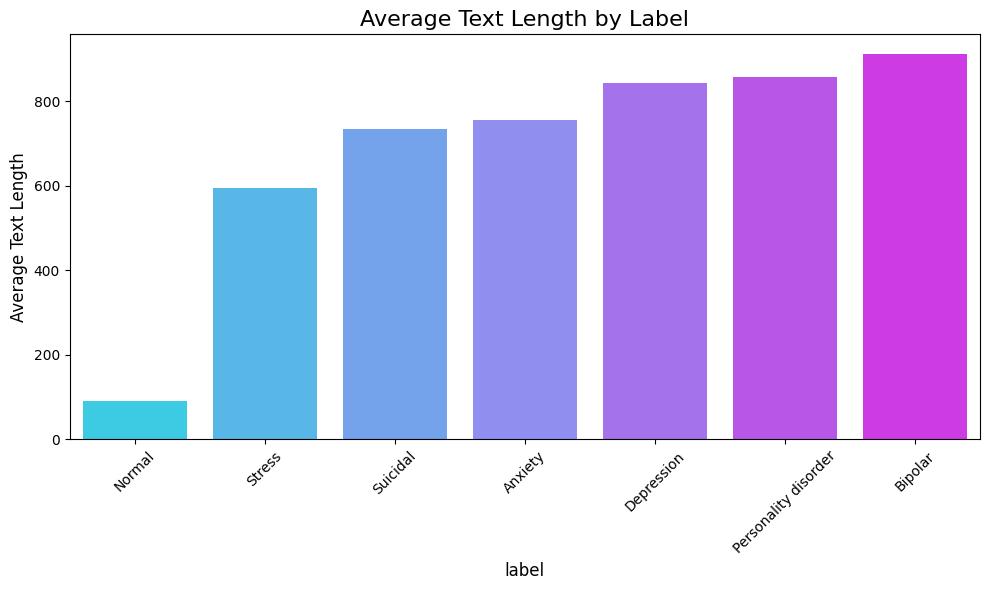

In [ ]:
# Visualizing Average Text Length by label

avg_text_length = df_dv.groupby('Label')['Text_Length'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_text_length.index, y=avg_text_length.values, palette='cool')
plt.title('Average Text Length by Label', fontsize=16)
plt.xlabel('label', fontsize=12)
plt.ylabel('Average Text Length', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

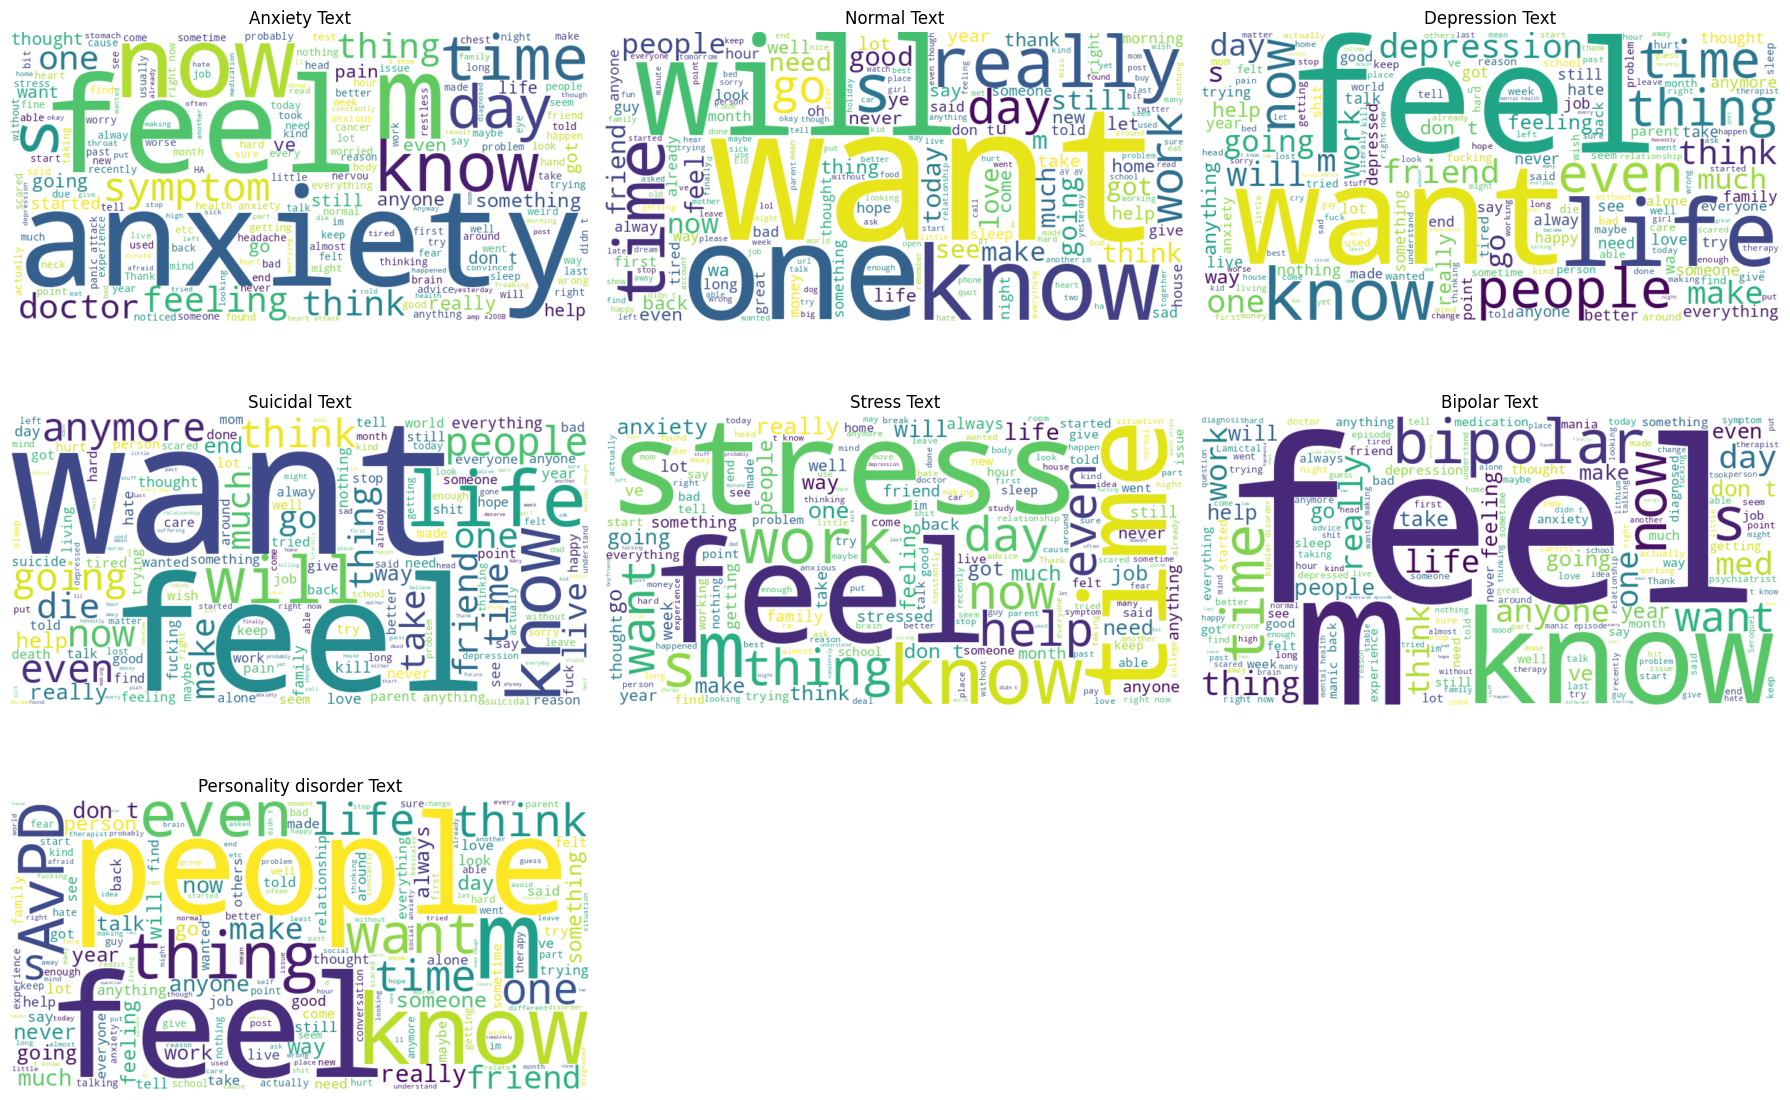

In [ ]:
# Creating WordCloud for all the lables

from wordcloud import WordCloud

emotion_dfs = {
    'Anxiety': df_dv[df_dv['Label'] == 'Anxiety'],
    'Normal': df_dv[df_dv['Label'] == 'Normal'],
    'Depression': df_dv[df_dv['Label'] == 'Depression'],
    'Suicidal': df_dv[df_dv['Label'] == 'Suicidal'],
    'Stress': df_dv[df_dv['Label'] == 'Stress'],
    'Bipolar': df_dv[df_dv['Label'] == 'Bipolar'],
    'Personality disorder': df_dv[df_dv['Label'] == 'Personality disorder'],
}

plt.figure(figsize=(18, 12))  #
for i, (emotion, subset) in enumerate(emotion_dfs.items(), 1):
    combined_text = ' '.join(subset['Text'].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

    plt.subplot(3, 3, i)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'{emotion} Text')
    plt.axis('off')

plt.tight_layout()
plt.show()

## Data Preprocessing

In [15]:
import re
import nltk
import sklearn
import tensorflow as tf
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from tensorflow.keras.utils import pad_sequences
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from transformers import BertTokenizer, TFBertForSequenceClassification

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [105]:
# Dropping Duplicated Rows

df.drop_duplicates(inplace=True)

In [106]:
# Dropping NA Values Rows

df.dropna(inplace=True)

In [107]:
# Creating a pipeline for Data Cleaning

def clean_text_pipeline(df, text_column='statement'):
    stop = set(stopwords.words('english'))

    def clean_text(text):

        text = str(text)
        text = re.sub(r'http\S+|www\S+|@\S+', '', text)  # Removing URLs and email addresses
        text = re.sub(r'[^\w\s]', '', text)        # Removing special characters and punctuation
        text = re.sub(r'\s+', ' ', text)           # Removing extra whitespaces
        text = text.lower()                        # Lowercasing text
        return text

    df[text_column] = df[text_column].apply(clean_text)
    return df

In [108]:
# Data Cleaning

df = clean_text_pipeline(df, text_column='statement')

In [109]:
# Dropping Unnamed Column

df.drop(columns=['Unnamed: 0'])

,statement,status
0,oh my gosh,Anxiety
1,trouble sleeping confused mind restless heart ...,Anxiety
2,all wrong back off dear forward doubt stay in ...,Anxiety
3,ive shifted my focus to something else but im ...,Anxiety
4,im restless and restless its been a month now ...,Anxiety
...,...,...
53038,nobody takes me seriously ive 24m dealt with d...,Anxiety
53039,selfishness i dont feel very good its like i d...,Anxiety
53040,is there any way to sleep better i cant sleep ...,Anxiety
53041,public speaking tips hi all i have to give a p...,Anxiety


In [ ]:
# Train Test And Split

X = df['statement']
y = df['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Load the BERT tokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [ ]:
# Tokenize the text

train_encodings = tokenizer(list(X_train), truncation=True, padding=True, max_length=128, return_tensors='tf')
test_encodings = tokenizer(list(X_test), truncation=True, padding=True, max_length=128, return_tensors='tf')

In [ ]:
# Create a mapping from labels to numerical values

label_mapping = {
    'Anxiety': 0,
    'Normal': 1,
    'Depression': 2,
    'Suicidal': 3,
    'Stress': 4,
    'Bipolar': 5,
    'Personality disorder': 6
}

In [ ]:
# Convert labels to numerical values using the mapping

y_train_numerical = y_train.map(label_mapping)
y_test_numerical = y_test.map(label_mapping)

In [ ]:
# Convert labels to TensorFlow tensors with correct dtype

train_labels = tf.convert_to_tensor(y_train_numerical, dtype=tf.int32)
test_labels = tf.convert_to_tensor(y_test_numerical, dtype=tf.int32)

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    train_labels
)).batch(32)

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    test_labels
)).batch(32)

In [ ]:
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=7)

In [ ]:
# Define the optimizer using AdamWeightDecay from transformers

optimizer = AdamWeightDecay(learning_rate=5e-5)

In [ ]:
# Compile the model

loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics = ['accuracy']
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [ ]:
model.summary()

In [ ]:
history = model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=3
)